In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('data/NH4_deconvoluated_TGA.csv')
df.drop(['rate_3_diff_reaction_0',
       'rate_3_diff_reaction_1', 'rate_3_diff_cumulative',
       'rate_5_diff_reaction_0', 'rate_5_diff_reaction_1',
       'rate_5_diff_cumulative', 'rate_10_diff_reaction_0',
       'rate_10_diff_reaction_1', 'rate_10_diff_cumulative'], axis=1, inplace=True)
df

,temperature,rate_5,rate_3,rate_10,rate_3_diff,rate_5_diff,rate_10_diff
0,31.23291,100.48009,99.46380,99.62310,0.000000,0.000000,0.000000
1,32.18783,100.49841,99.47196,99.63159,0.000000,0.000000,0.000000
2,33.14274,100.49727,99.46862,99.64153,0.000000,0.000000,0.000000
3,34.09766,100.49974,99.46740,99.65072,0.000000,0.000000,0.000000
4,35.05257,100.50067,99.46966,99.66333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
485,494.36669,0.54784,-0.35920,0.25374,0.000099,0.008912,0.000749
486,495.32160,0.53527,-0.35239,0.25189,-0.003644,0.007964,0.001754
487,496.27652,0.53263,-0.35224,0.25039,-0.000099,-0.002508,0.000785
488,497.23143,0.54006,-0.35220,0.25039,0.004854,-0.004346,-0.000000


In [13]:
df = pd.read_csv('experiment_results.csv')
df['coefficient_1'] = df['coefficient_1'].round(4)
df['coefficient_2'] = df['coefficient_2'].round(4)

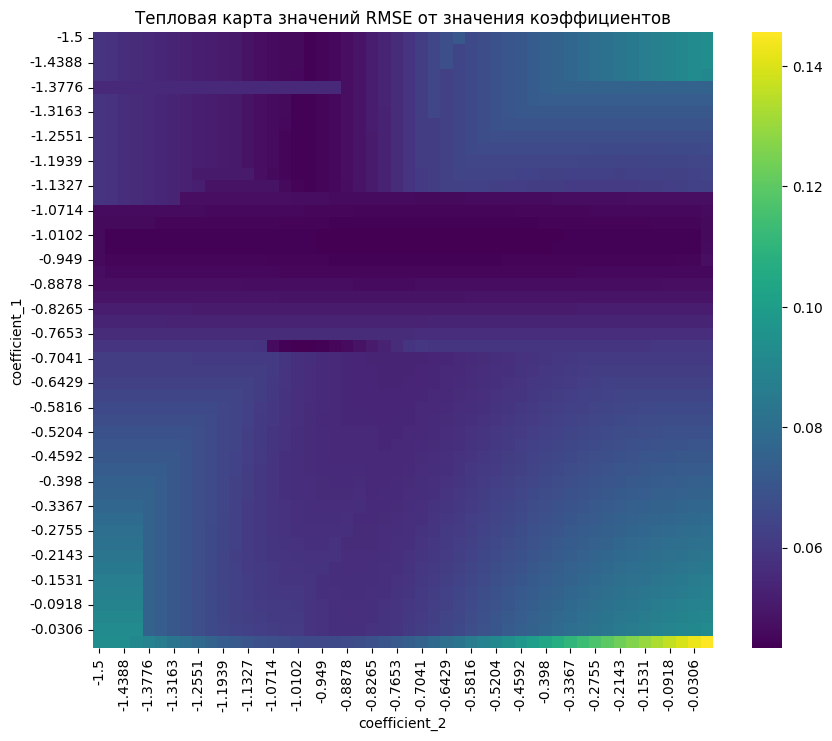

In [14]:
# Преобразование данных в форму, подходящую для тепловой карты
heatmap_data = df.pivot(index='coefficient_1', columns='coefficient_2', values='rmse')

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Тепловая карта значений RMSE от значения коэффициентов')
plt.show()

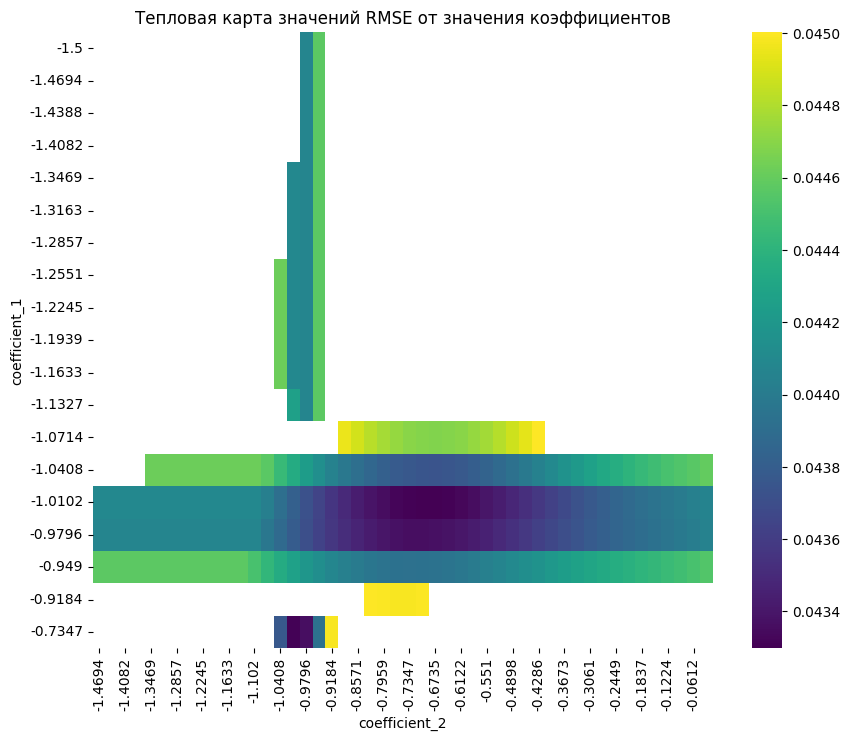

In [27]:
top_100 = df.sort_values(by='rmse').head(250)


# Преобразование данных в форму, подходящую для тепловой карты
heatmap_data = top_100.pivot(index='coefficient_1', columns='coefficient_2', values='rmse')

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Тепловая карта значений RMSE от значения коэффициентов')
plt.show()

In [3]:
_df = pd.DataFrame()
display(_df.size == 0)
_df['gauss'] = [0, 1]
_df['frazer'] = [2, 3]
_df.size

True

4

In [1]:
import plotly.express as px

import pandas as pd

# Указываем путь к файлу
file_path = "data/NH4_deconvoluated_TGA.csv"

# Загружаем файл в DataFrame, пропуская первую строку и указывая разделитель 
df = pd.read_csv(file_path, sep=",")#, skiprows=1)
df = df.fillna(0)

df.head()

,temperature,rate_5,rate_3,rate_10,rate_3_diff,rate_5_diff,rate_10_diff
0,31.23291,100.48009,99.46380,99.62310,0.0,0.0,0.0
1,32.18783,100.49841,99.47196,99.63159,0.0,0.0,0.0
2,33.14274,100.49727,99.46862,99.64153,0.0,0.0,0.0
3,34.09766,100.49974,99.46740,99.65072,0.0,0.0,0.0
4,35.05257,100.50067,99.46966,99.66333,0.0,0.0,0.0


In [3]:
df['temperature'][0]

31.23291

In [18]:
# Построение графика
fig = px.line(df, x=df.index, y='rate_10_diff', title='График rate_10_diff')
fig.show()

<Axes: >

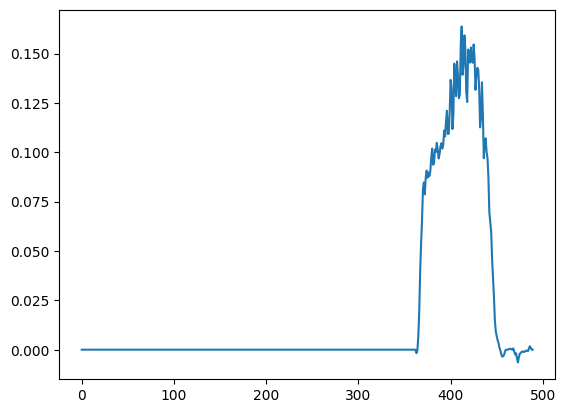

In [20]:
df['rate_3_diff'].iloc[:313] = 0
df['rate_5_diff'].iloc[:334] = 0
df['rate_10_diff'].iloc[:363] = 0
df['rate_10_diff'].plot()

In [26]:
# Сохраняем DataFrame в CSV-файл
df.to_csv("data/NH4_deconvoluated_TGA.csv", index=False, sep=',')